In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from torchvision import datasets, transforms

train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
X_train, y_train = train_set.data.numpy().reshape((-1,784)), train_set.targets.numpy()
X_test, y_test = test_set.data.numpy().reshape((-1,784)), test_set.targets.numpy()

In [4]:
def convert_one_hot(y):
  num_values = np.max(y)+1
  return np.eye(num_values)[y]

In [5]:
y_train = convert_one_hot(y_train)
y_test = convert_one_hot(y_test)

In [6]:
X_valid = X_train[58000:].T
y_valid = y_train[58000:].T

In [7]:
def initialize_parameters(input_dim, hidden_dim, output_dim):
  W1 = np.random.randn(hidden_dim,input_dim) * 0.01

  
  W2 = np.random.randn(output_dim,hidden_dim) * 0.01

  
  initial_params = {
      "W1":W1,
      "W2":W2,


  }

  return initial_params


In [8]:

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1-sigmoid(x))


In [9]:
def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [10]:
def forward_pass(x, params):

  W1 = params["W1"]
  W2 = params["W2"]

  
  z1 = np.matmul(W1,x)
  a1 = sigmoid(z1)
  z2 = np.matmul(W2,a1)
  a2 = softmax(z2)
  
  forward_pass_params = {
      "Z1" : z1,
      "A1" : a1,
      "Z2" : z2,
      "A2" : a2

  }
  return forward_pass_params


In [11]:
def compute_loss(predictions, ground_truth, epsilon=1e-12):

  batch_size = ground_truth.shape[1]
  cross_entropy = -(1/batch_size) * np.sum(ground_truth*np.log(predictions+epsilon)) 
  return cross_entropy 

In [12]:
def backward_pass(x, initial_params, forward_pass_params, ground_truth):

  batch_size = x.shape[1]

  W1 = initial_params["W1"]
  W2 = initial_params["W2"]

  Z1 = forward_pass_params["Z1"]
  A1 = forward_pass_params["A1"]
  
  Z2 = forward_pass_params["Z2"]
  A2 = forward_pass_params["A2"]
  
  dZ2 = A2 - ground_truth
  dW2 = (1/batch_size) * np.matmul(dZ2,A1.T) 
  
   
  dZ1 = (1/batch_size) * np.matmul(W2.T,dZ2) * sigmoid_derivative(Z1)
  dW1 = (1/batch_size) * np.matmul(dZ1,x.T)
  



  grads = {
      "W1" : dW1,
      "W2": dW2,
    

  }  
  return grads


In [13]:
def optimizer_step(initial_params, grads, lr):
  
  W1 = initial_params["W1"]
  W2 = initial_params["W2"]

  W1 = W1 - lr * grads["W1"]
  W2 = W2 - lr * grads["W2"]
 
  

  


  updated_parameters = {
      "W1":W1,
      "W2":W2,


  }
  return updated_parameters

In [14]:
def compute_accuracy(X_test, y_test, params):
    forward_pass_params = forward_pass(X_test, params)
    prediction_proba = forward_pass_params['A2']   # containes propabilities with shape(10, 1)
    predictions = np.argmax(prediction_proba, axis=0)  # 0 represents row wise 
    ground_truth = np.argmax(y_test, axis = 0)
    accuracy = np.mean(predictions == ground_truth)*100
    return accuracy

In [15]:
def compute_test_loss(X_test, y_test, params):
    forward_pass_params = forward_pass(X_test, params)
    predictions = forward_pass_params['A2']   # containes propabilities with shape(10, 1)
    test_loss = compute_loss(predictions, y_test)  # 0 represents row wise 
    
    return test_loss

In [16]:
def train(x, ground_truth, hidden_dim, lr, num_iters, validation_iter):

  input_dim = x.shape[0]
  output_dim = ground_truth.shape[0]

  params = initialize_parameters(input_dim, hidden_dim, output_dim)
  train_loss_list = []
  valid_loss_list = []
  valid_accuracy_list = []
  train_accuracy_list = []
  for i in range(num_iters):

    forward_pass_params = forward_pass(x, params)
    predictions = forward_pass_params["A2"]
    
    train_loss = compute_loss(predictions, ground_truth)
    train_accuracy = compute_accuracy(x, ground_truth,params)
    grads = backward_pass(x, params, forward_pass_params, ground_truth)
    

    params = optimizer_step(params, grads, lr)
    
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)

    

    if i%20 == 0:
      print("Train Loss at iteration"+str(i)+"is :"+str(train_loss))
      print("Train accuracy at iteration "+str(i)+"is :"+str(train_accuracy))

    if i % validation_iter == 0:
      forward_pass_params = forward_pass(X_valid, params)
      predictions = forward_pass_params["A2"]
      
      valid_loss = compute_loss(predictions, y_valid)
      valid_accuracy = compute_accuracy(X_valid,y_valid,params)
      valid_accuracy_list.append(valid_accuracy)
      valid_loss_list.append(valid_loss)
      print("*******************************************************")
      print("Valid loss at iteration"+str(i)+"is :"+str(valid_loss))
      print("Valid accuracy at iteration "+str(i)+"is :"+str(valid_accuracy))
      print("*******************************************************")
      

    
  
  return train_loss_list, train_accuracy_list, valid_loss_list, valid_accuracy_list, params
      







In [17]:
def plot(suffix):
    x = np.arange(0, iterations)
    plt.plot(x, train_loss_list)
    plt.title("Train Loss - MNIST")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Train Loss")
    plt.show()
    plt.savefig("mnistplots/train_loss"+suffix+".pdf")

    x = np.arange(0, iterations)
    plt.plot(x, train_accuracy_list)
    plt.title("Train Accuracy - MNIST")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Train Accuracy")
    plt.show()
    plt.savefig("mnistplots/train_accuracy"+suffix+".pdf")

    x = np.arange(0, iterations,50)
    plt.plot(x, valid_loss_list)
    plt.title("Validation Loss - MNIST")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Validation Loss")
    plt.show()
    plt.savefig("mnistplots/valid_loss"+suffix+".pdf")

    x = np.arange(0, iterations,50)
    plt.plot(x, valid_accuracy_list)
    plt.title("Validation Accuracy - MNIST")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Validation Accuracy")
    plt.show()
    plt.savefig("mnistplots/valid_accuracy"+suffix+".pdf")

**Overfitting on small dataset to verify correctness of implementation**

In [18]:
iterations = 1000
validation_iter = 50
n_h = 250
learning_rate = 0.01
train_loss_list, train_accuracy_list, valid_loss_list, valid_accuracy_list, params = train(X_train[:100].T, y_train[:100].T, n_h, learning_rate, iterations, validation_iter)

Train Loss at iteration0is :2.3042238976066964
Train accuracy at iteration 0is :10.0
*******************************************************
Valid loss at iteration0is :2.316129126790267
Valid accuracy at iteration 0is :7.75
*******************************************************
Train Loss at iteration20is :2.0589285508311694
Train accuracy at iteration 20is :43.0
Train Loss at iteration40is :1.856163438076079
Train accuracy at iteration 40is :71.0
*******************************************************
Valid loss at iteration50is :2.0289608203125837
Valid accuracy at iteration 50is :46.1
*******************************************************
Train Loss at iteration60is :1.6694376162991154
Train accuracy at iteration 60is :83.0
Train Loss at iteration80is :1.4977002001897592
Train accuracy at iteration 80is :85.0
Train Loss at iteration100is :1.3417113440574195
Train accuracy at iteration 100is :85.0
*******************************************************
Valid loss at iteration100is

**Model achieves 100% accuracy on train set. Implementation is verified.**

#Using 5000 samples as training data

In [22]:
iterations = 5000
validation_iter = 50
n_h = 250
learning_rate = 0.01
train_loss_list, train_accuracy_list, valid_loss_list, valid_accuracy_list, params = train(X_train[:5000].T, y_train[:5000].T, n_h, learning_rate, iterations, validation_iter)

Train Loss at iteration0is :2.32206916022937
Train accuracy at iteration 0is :7.920000000000001
*******************************************************
Valid loss at iteration0is :2.3154473201568164
Valid accuracy at iteration 0is :9.85
*******************************************************
Train Loss at iteration20is :2.1970244935962855
Train accuracy at iteration 20is :40.36
Train Loss at iteration40is :2.0888385879258298
Train accuracy at iteration 40is :55.94
*******************************************************
Valid loss at iteration50is :2.0237854447073205
Valid accuracy at iteration 50is :63.7
*******************************************************
Train Loss at iteration60is :1.9899616504916933
Train accuracy at iteration 60is :62.13999999999999
Train Loss at iteration80is :1.8995981624792353
Train accuracy at iteration 80is :65.4
Train Loss at iteration100is :1.8170681005710365
Train accuracy at iteration 100is :68.04
*******************************************************

In [23]:
print("Test accuracy is"+str(compute_accuracy(X_test.T,y_test.T, params)))

Test accuracy is86.53


In [24]:
print("Test Loss is"+str(compute_test_loss(X_test.T,y_test.T, params)))

Test Loss is0.47665802010632363


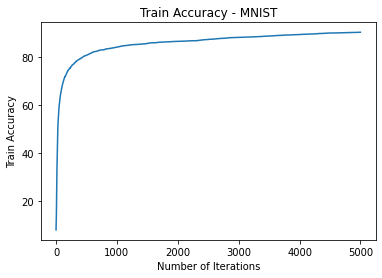

In [33]:
    x = np.arange(0, iterations)
    plt.plot(x, train_accuracy_list)
    plt.title("Train Accuracy - MNIST")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Train Accuracy")
    plt.show()

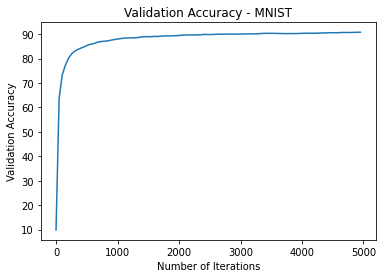

In [35]:
    x = np.arange(0, iterations,50)
    plt.plot(x, valid_accuracy_list)
    plt.title("Validation Accuracy - MNIST")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Validation Accuracy")
    plt.show()